In [ ]:
# Stackleberg Game Model
## N-Player 

Define a pricing demand as a linear function and call it a "Market Demand Curve"

```
P = a  -  b * Q
```

Where Q is the market quantity demanded and P is the market price in dollars
The firms create the quantity.

The quantity created for the market comes from multiple firms. The firms in a Stackleberg game provide some quantity after the leader firm goes first. The leader firm assumes the moves of the other firms and tries to maximize its profit by incurring the costs to meet the demand that it deems appropriate given its own costs. The demand is met through a total quantity that can be represented by the combination of all of the players quantity. 

```
Q = q1 + q2 + ... qN
```

### Marginal costs
The cost to meet a single unit of demand per unit qunatity created. This is a pre-defined metric or can be a dynamic value. Knowing the marginal costs is critical to determining the other players moves. The Leader needs to know what it would cost other players to take action. 




In [ ]:

### Calculate The Leaders Most Profitable Move
---
Begin backward induction to determine what the reaction would be of the other firms.
Lets assume two firms A, and B. The procedure to determine the Leaders (firm A) move would be as follows:
    
    1. Calculate Firm B's reaction
    2. Calculate Firm A's response to B's reaction 
    3. Implement Firm A's response
    4. Calculate Firm B's response given A's response
    5. End Game


In [40]:
from sympy import * 
init_printing(use_latex='mathjax')
from IPython.display import display
import string
alpha = list(map(chr, range(97, 123)))


In [ ]:
## Simulation of Duopoly (2 Firms)
---
Parameters:
- Number of Firms : 2
- Demand Curve : P = 120 - 0.5*Q
- Marginal Cost firm A : 20
- Marginal Cost firm B : 22




In [41]:
firms = 2
N = symbols('N_{Firms}')
display(Eq(N,firms))

# Marginal Cost
MC = [symbols('MC_%s'% i) for i in alpha]
for i in range(firms):
    cost = 10 + i*2
    display(Eq(MC[i],cost))
    MC[i]=cost

# General Market Demand Curve
b,m = symbols('b,m')
P_d = symbols('P_{T}')
Q_d = symbols('Q_{D}')
display(Eq(P_d,b-m*Q_d))
b = 120
m = 0.5
display(Eq(P_d,b-m*Q_d))
P_d=b-m*Q_d


N_{Firms} = 2

MCₐ = 10

MC_b = 12

P_{T} = -Q_{D}⋅m + b

P_{T} = -0.5⋅Q_{D} + 120

## The Demand Curve - Rules of Supply
By inspecting the demand curve we can see that all the quantity generated by the payers (x-axis) will result in a total price for all the quantity (y-axis) at different levels of demand met. The pricing demand curve can now be used as a total demand and total quantity output that will be presented to the players. At some break even point the price demand for a unit is no longer advantageous considering the cost to the player to meet that demand. 

The break even point would be the profit maximizing point for the player . In the stackleberg game the leader tries to maximize its output by looking at the break even point of the secondary player. If the marginal costs are lower for the follower they can generate more quantity and outsell the leader. This means the leader should make enough to break even and just enough to reduce the gains of the follower.

Again, by only looking at the demand curve the leader can only determine a break even point based on its own cost. As soon as it costs more to meet the demand than the price of the demand then the leader stops and no longer produces. If the demand must be met, then the rest of the demand is left for the second player to take on. If the second player looks at the remaining demand and only supplies what it can break even then both players are left supplying demand with diminishing returns. 

To avoid having to supply diminishing returns the leader can take into account the maximizing move for the second player and then include that in determining its stake in the market based on its own costs and break even point. 




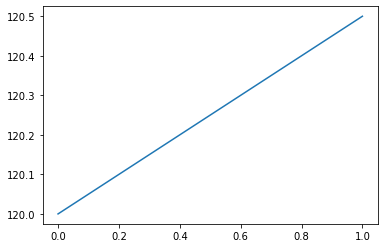

In [42]:
# Plot inverse demand curve
import matplotlib
import matplotlib.pyplot as plt
abline_values = [m * i + b for i in range(firms)]
plt.plot(range(firms),abline_values)
plt.show()

In [43]:
# Total Market Quantity Demand
q = [symbols('q_%s'% i) for i in alpha]
Q = sum(q[i] for i in range(firms))
display(Eq(Q_d,Q))

Q_{D} = qₐ + q_b

In [44]:
# Market Demand Curve
P = b - m * Q
display(Eq(P_d,P))

-0.5⋅Q_{D} + 120 = -0.5⋅qₐ - 0.5⋅q_b + 120

In [45]:
# Total Revenue
TR = [symbols('TR_%s'% i) for i in alpha]
for i in range(firms-1):
    display(Eq(TR[i+1],expand(P * q[i+1])))
    TR[i+1]= expand(P * q[i+1])

                            2          
TR_b = -0.5⋅qₐ⋅q_b - 0.5⋅q_b  + 120⋅q_b

Marginal revenue can be derived from the derivative of the total revenue, with respect to the firm.

In [46]:
# Marginal Revenue
MR = [symbols('MR_%s'% i) for i in alpha]
for i in range(firms-1):
    display(Eq(MR[i+1],Derivative(TR[i+1],q[i+1])))
    display(Eq(MR[i+1],Derivative(TR[i+1],q[i+1]).doit()))
    MR[i+1]= Derivative(TR[i+1],q[i+1]).doit()

        ∂  ⎛                     2          ⎞
MR_b = ────⎝-0.5⋅qₐ⋅q_b - 0.5⋅q_b  + 120⋅q_b⎠
       ∂q_b                                  

MR_b = -0.5⋅qₐ - 1.0⋅q_b + 120

In [47]:
# Reaction Functions :
qq = [symbols('q^{*}_%s'% i) for i in alpha]
for i in range(firms-1):
    display(Eq(qq[i+1],solve(MR[i+1] - MC[i+1],q[i+1])[0]))
    qq[i+1]=solve(MR[i+1] - MC[i+1],q[i+1])[0]

q_b__{*} = -0.5⋅qₐ + 108.0

### Response Function of the Leader

The leader takes into account all the reactions create a leader response to the reactions. The approach is to use back induction to take the forecasted reaction of the follower when the marginal cost is equal to the marginal revenue (profit maximizing). That means that the follower will stop at some break even point that maximizes its profits. Given that information the leader can take that reaction and assume it is what the follower will do. The assumption is used in the price demand formula. 


In [48]:
# Leaders market demand in terms of leader quantity
P_0 = P 
P_a = symbols('P_Leader')
for i in range(firms - 1) :
    P_0 = P_0.subs(q[i+1],qq[i+1])

display(Eq(P_d,P))

display(Eq(P_a,P_0))


-0.5⋅Q_{D} + 120 = -0.5⋅qₐ - 0.5⋅q_b + 120

P_Leader = -0.25⋅qₐ + 66.0

In [49]:

TR_0 = expand(P_0 * q[0])
TR_a = symbols('TR_a')
display(Eq(TR_a,TR_0))

               2          
TRₐ = - 0.25⋅qₐ  + 66.0⋅qₐ

In [50]:
MR_0 = Derivative(TR_0,q[0]).doit()
MR_a = symbols('MR_a')
display(Eq(MR_a,Derivative(TR_0,q[0])))
display(Eq(MR_a,MR_0))

       d ⎛         2          ⎞
MRₐ = ───⎝- 0.25⋅qₐ  + 66.0⋅qₐ⎠
      dqₐ                      

MRₐ = -0.5⋅qₐ + 66.0

In [51]:
# Most profit maximizing quantity for leader is q_0
q_0 = solve(MR_0-MC[0],q[0])[0]
q_a = symbols('q^Final_a')
display(Eq(q_a,q_0))

q_a__Final = 112.0

### Implement Leaders Action

After derving the most profitable quantity for the leader with the assumptions of the secondary firm B, the leader is ready to Implement the strategy. After implementing the strategy we can determine the remaining quantityleft over for the secondary player and how much it ended up supplying on its turn. This would be the reaction taken by the secondary term in practice. 


In [52]:
# Reactions Taken :
qqq = [symbols('q_%s__Final'% i) for i in alpha]
for i in range(firms-1):
    display(Eq(qqq[i+1],qq[i+1].subs(q[0],q_0)))
    qqq[i]=qq[i+1].subs(q[0],q_0)

q_b__Final = 52.0

In [53]:
P_d=b-m*Q_d
display(Eq(Q_d,Q))
q[0] = q_0
for i in range(firms-1):
    q[i+1] = qqq[i]

Q_{D} = qₐ + q_b